In [1]:
import pandas as pd
from vnstock import *
from datetime import datetime
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
start = '2020-01-01'
now = datetime.now() - timedelta(days=1)
day = now.strftime("%d/%m/%Y")
now = now.strftime("%Y-%m-%d")
now

'2024-03-15'

In [7]:
df = stock_historical_data('ACB', start, now, "1D", "stock")
df = df[['time', 'close']].rename(columns={"time": "Date", "close": 'ACB'})

In [8]:
stocks_list = ['MWG', 'MSN', 'BID', 'VRE', 'POW', 'PLX', 'HPG', 
               'VNM', 'VHM', 'TCB', 'HDB', 'VIB', 'VCB', 'VJC',
              'VIC', 'FPT', 'CTG', 'TPB', 'BVH', 'GVR', 'SAB', 
              'BCM', 'MBB', 'GAS', 'SSB', 'SHB', 'SSI', 'STB', 'VPB' ]

for stock in stocks_list:
    stock_df = stock_historical_data(stock, start, now, "1D", "stock")
    stock_df = stock_df[['time', 'close']].rename(columns={"time": "Date", "close": stock})
    stock_df.drop_duplicates(subset = ['Date'], keep= 'last', inplace= True)
    df = df.merge(stock_df, how = 'left', on = 'Date')

df.to_csv('data/VN30.csv', index = True)

,Date,ACB,MWG,MSN,BID,VRE,POW,PLX,HPG,VNM,...,GVR,SAB,BCM,MBB,GAS,SSB,SHB,SSI,STB,VPB
0,2020-01-02,9460,37730,46160,32369,34350,11352,48590,10930,81400,...,10150.0,100180,28160.0,9680,68440,NaN,2990.0,8740,10200,7250
1,2020-01-03,9460,37170,46570,32229,34600,11161,49100,11000,81660,...,10500.0,100440,27880.0,9700,68590,NaN,2900.0,8670,10200,7200
2,2020-01-06,9260,36990,45830,31610,33650,10827,49280,10930,81040,...,10320.0,100080,27590.0,9560,70760,NaN,2860.0,8640,10050,7030
3,2020-01-07,9260,37270,46000,32229,33950,10731,48590,10790,81800,...,10050.0,100180,26830.0,9580,70250,NaN,2860.0,8670,10150,7180
4,2020-01-08,9090,36370,45350,32509,32700,10254,47910,10680,82000,...,9700.0,99810,26640.0,9450,70180,NaN,2860.0,8430,9980,7090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,2024-03-11,26750,46400,77500,50500,24500,11600,35950,29900,69400,...,29550.0,59300,67100.0,22950,77800,22550.0,11400.0,36350,30200,18550
1041,2024-03-12,26750,46750,78700,52000,25200,11500,36350,30200,69110,...,31600.0,59100,67900.0,23100,77900,22550.0,11300.0,36300,30250,18550
1042,2024-03-13,27650,48550,80900,52600,25900,11600,37100,30800,69900,...,32299.0,59600,69200.0,23850,79000,22600.0,11550.0,37950,30850,19050
1043,2024-03-14,27250,47250,78900,51700,25900,11600,37350,30350,69600,...,32800.0,58700,67900.0,23450,81000,22600.0,11450.0,37850,30450,18800


In [12]:
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [13]:
def interactive_plot(df, title):
  
  for i in df.columns[1:]:
    plt.figure(figsize=(16, 6))
    sns.lineplot(df, x = 'Date', y = df[i])
    plt.show()

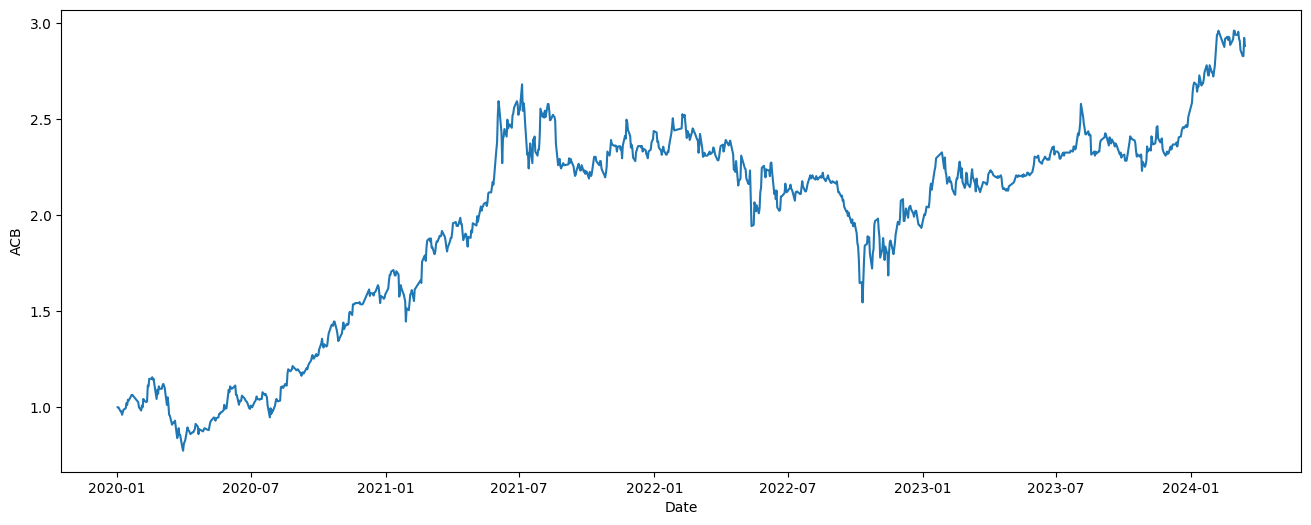

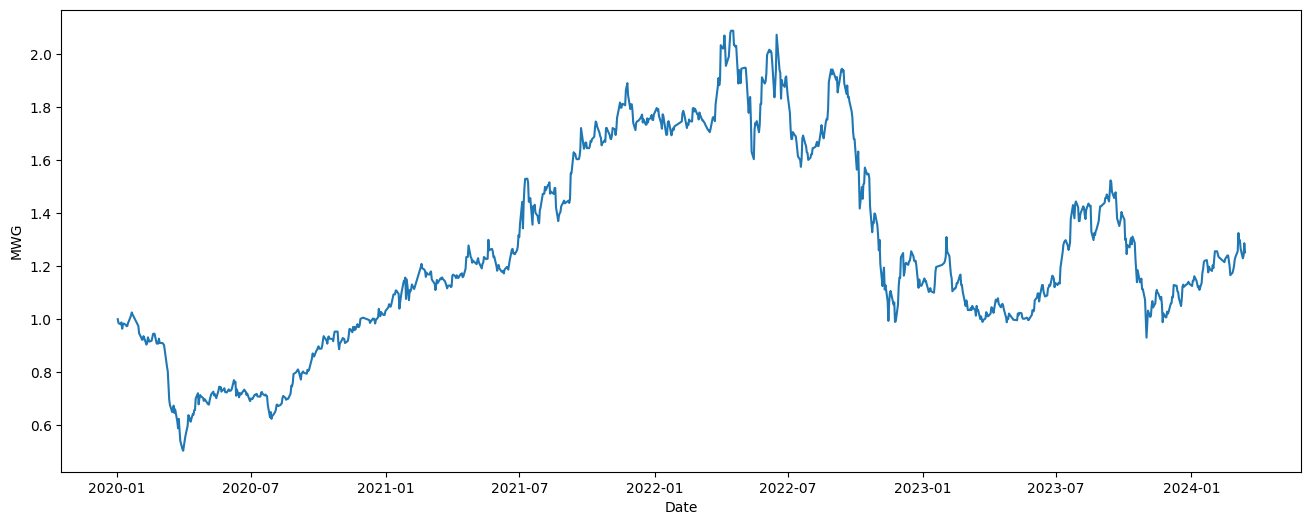

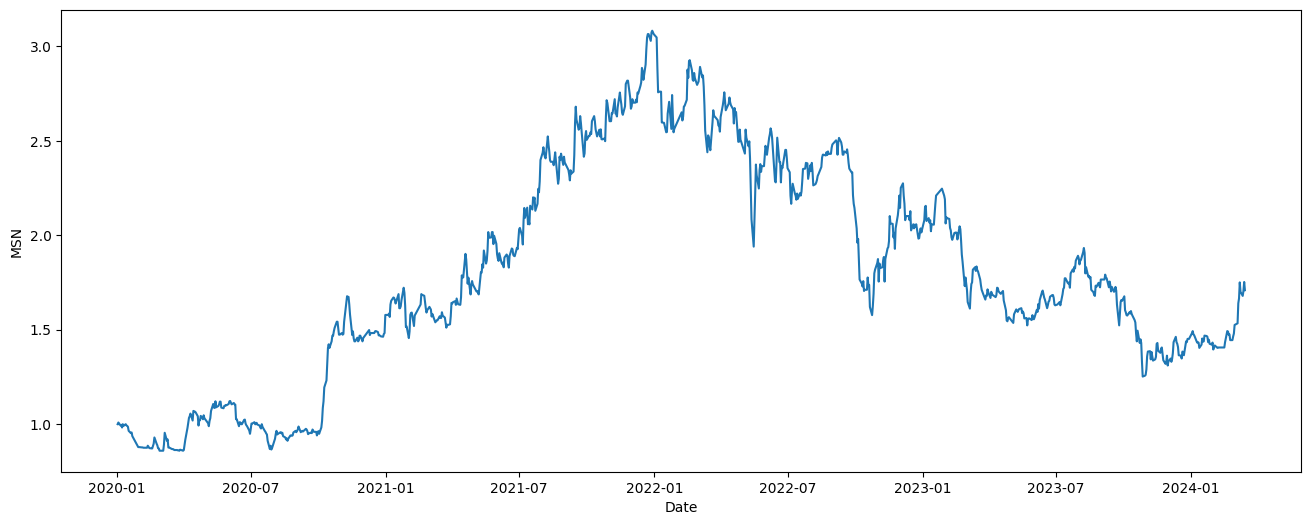

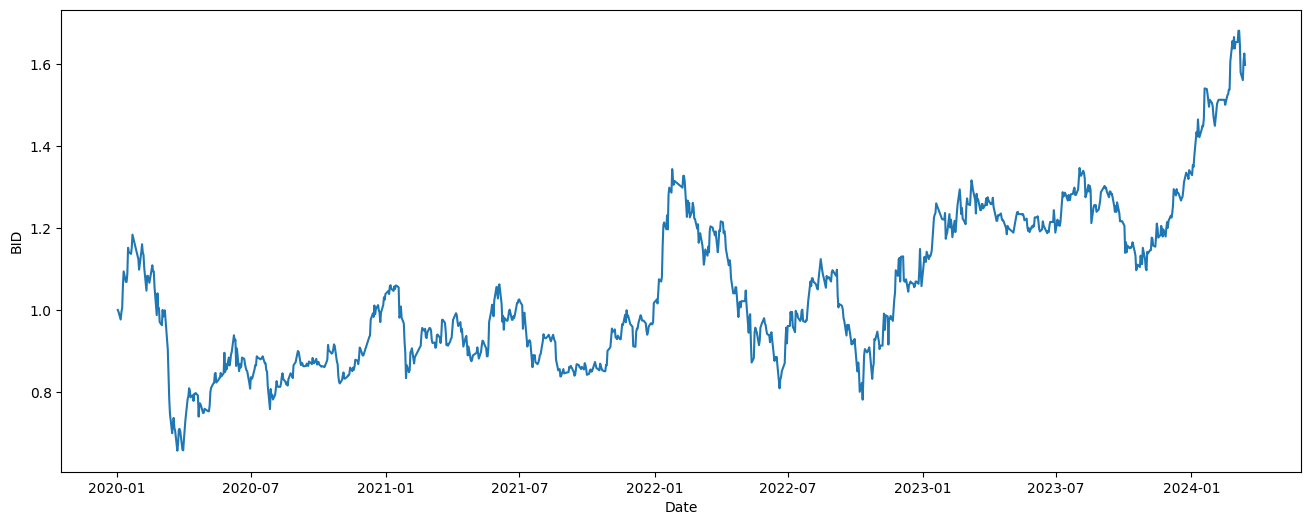

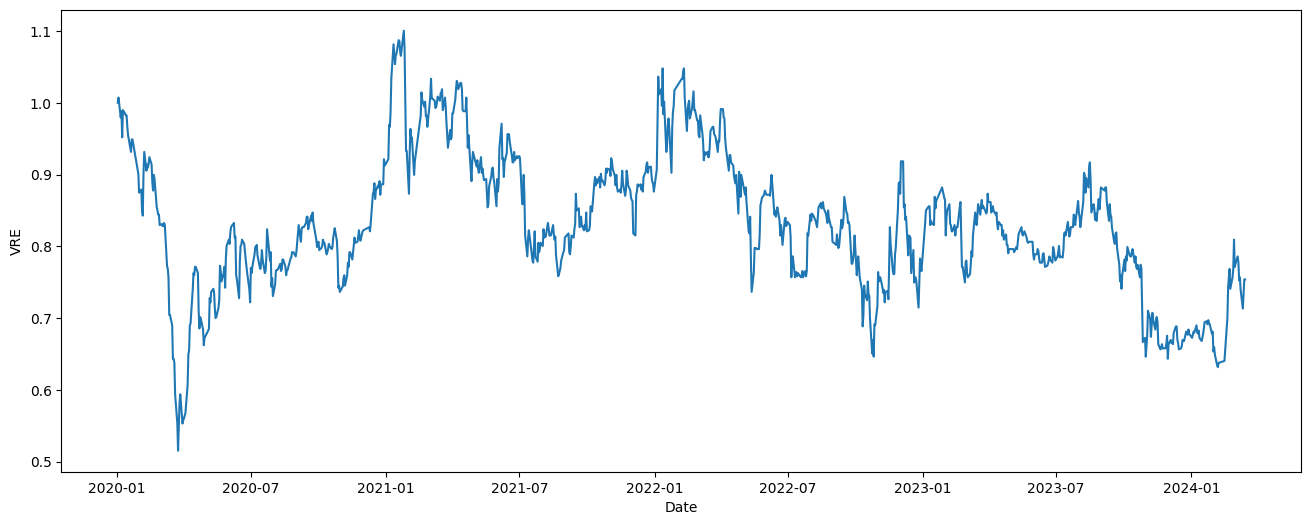

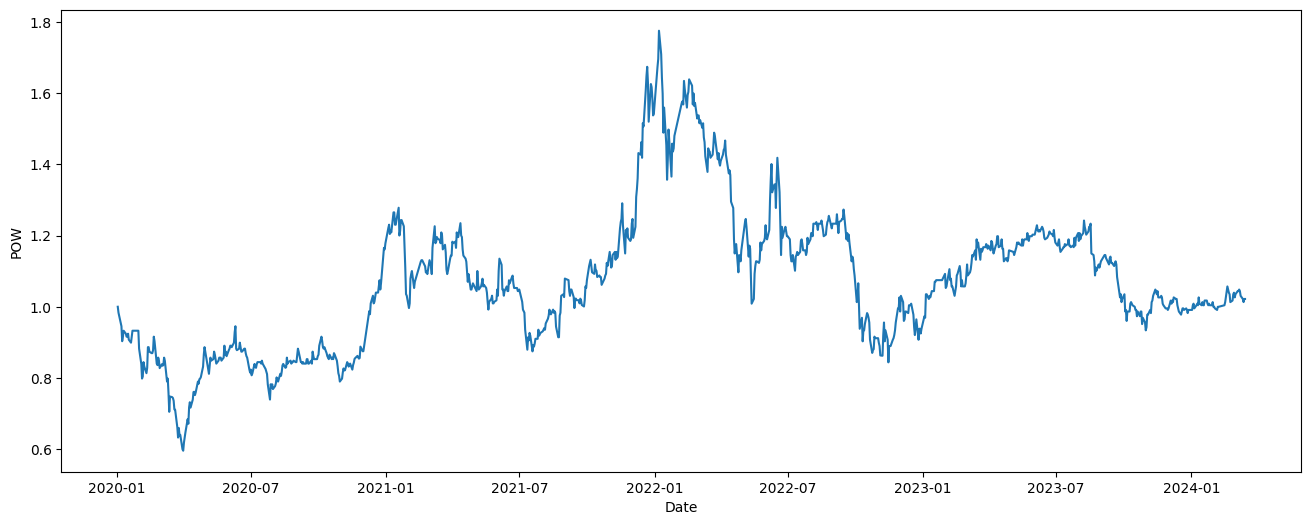

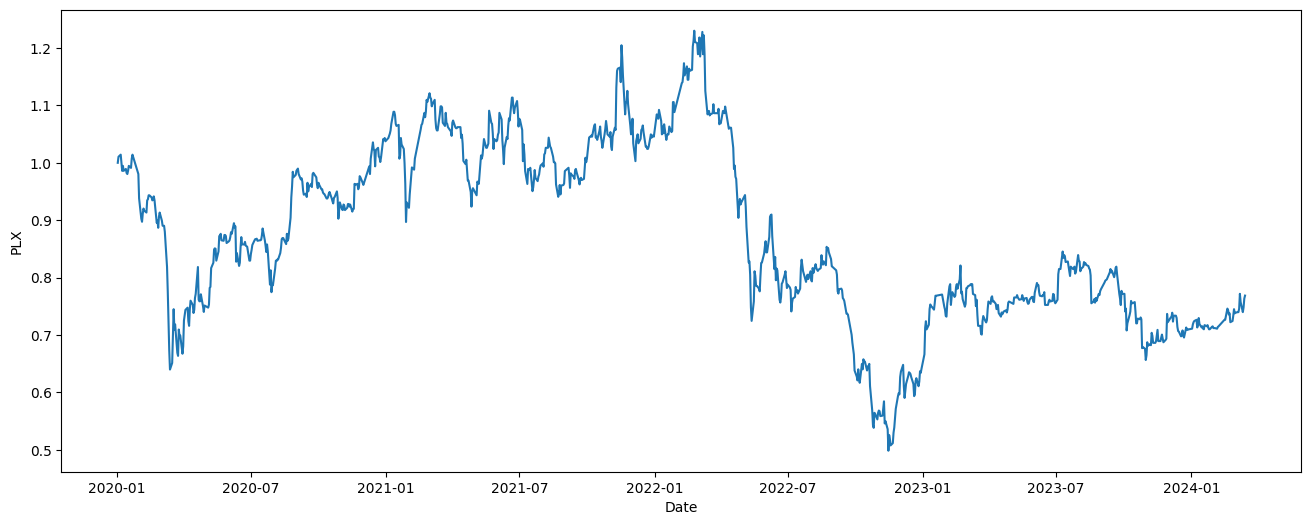

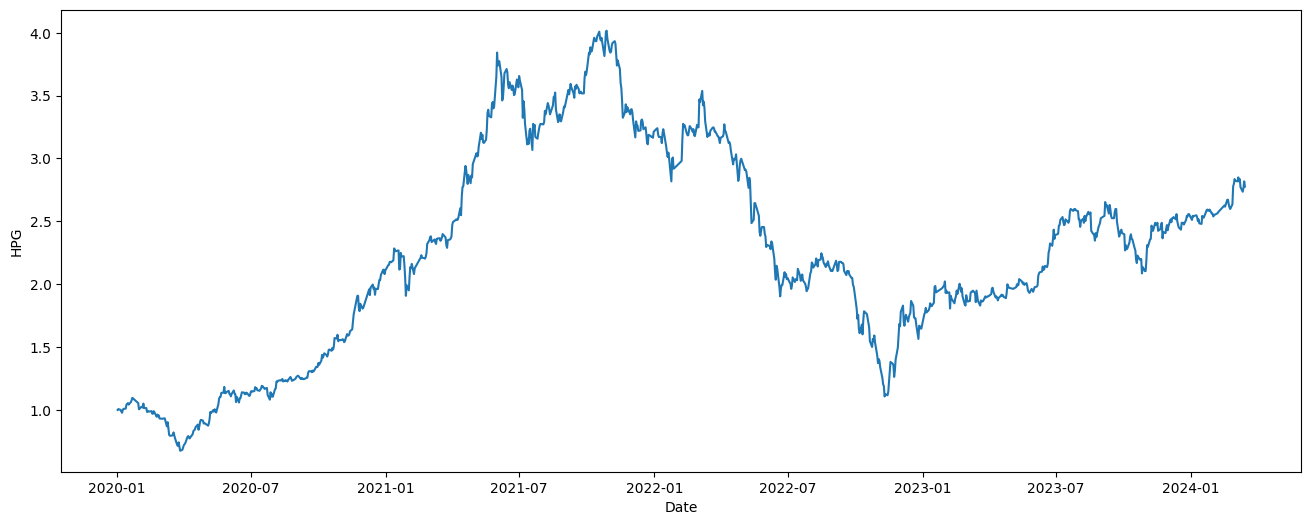

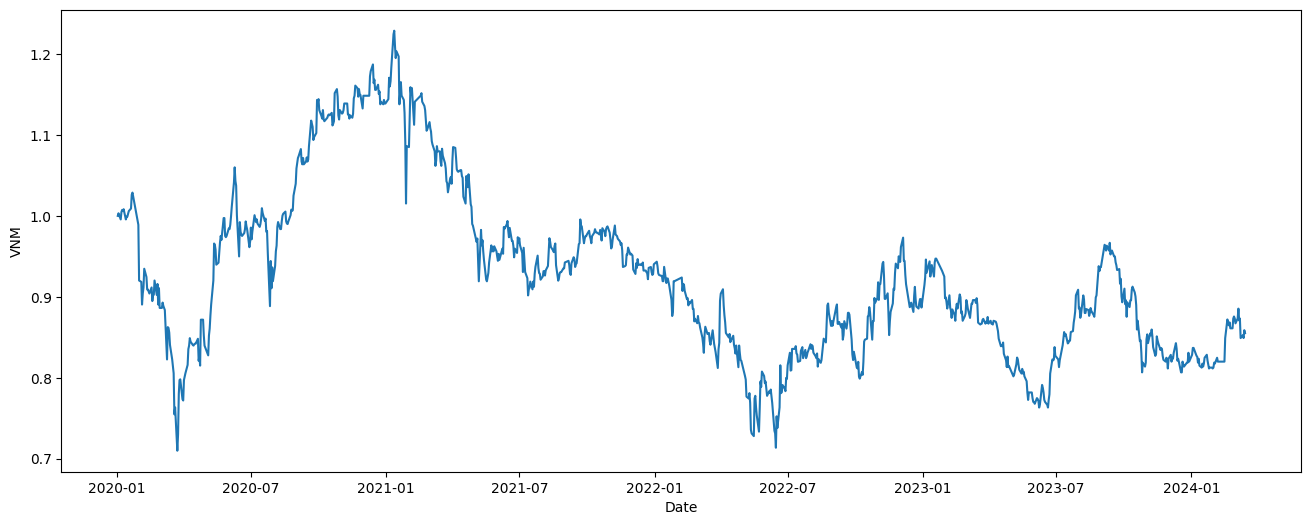

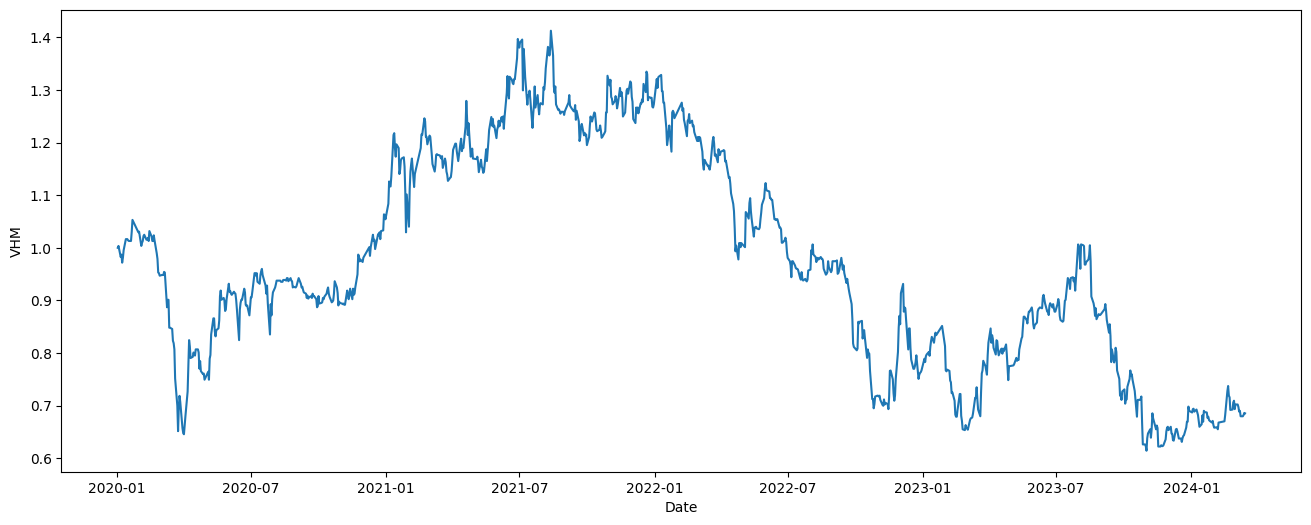

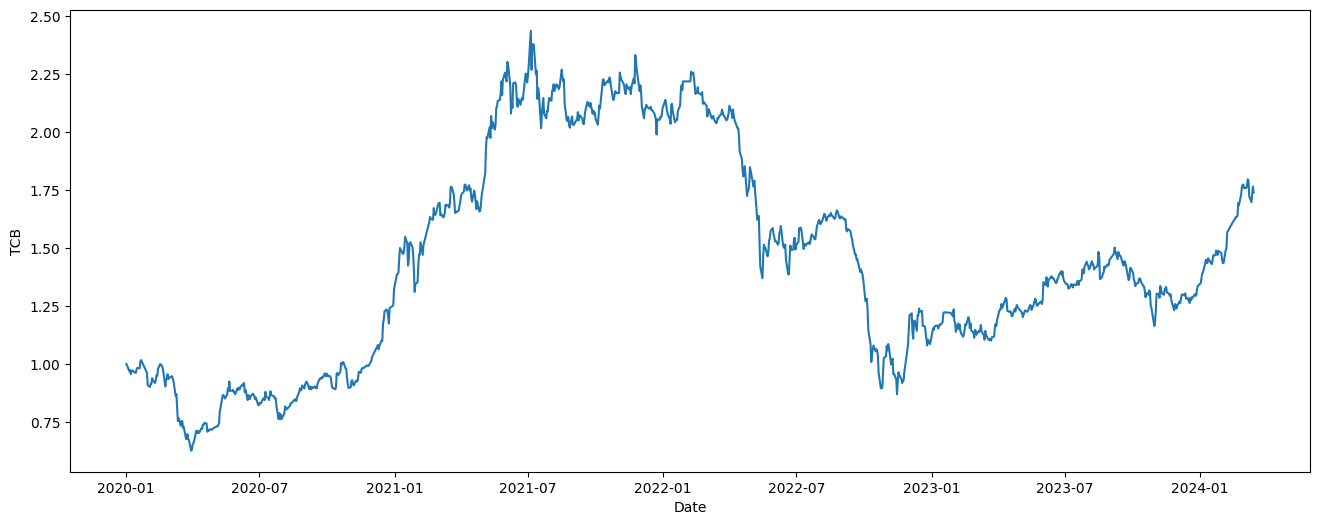

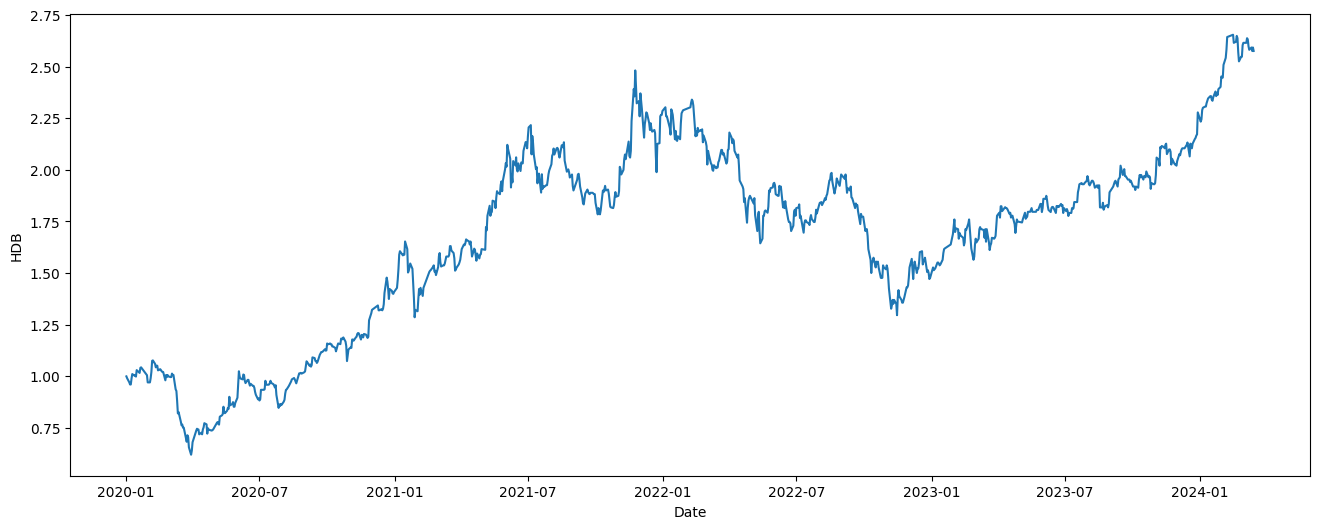

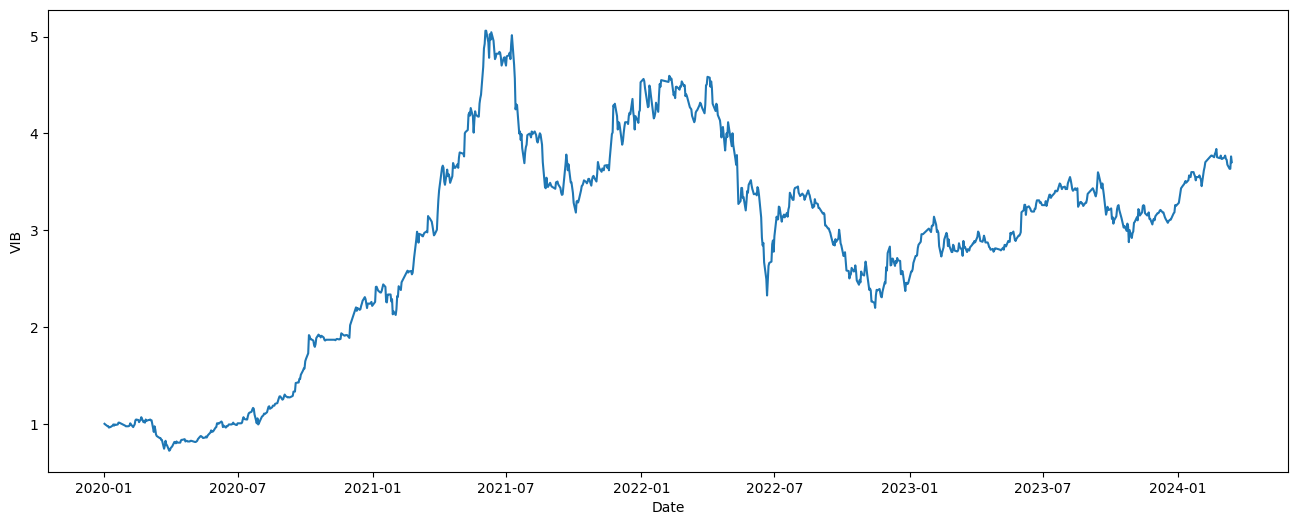

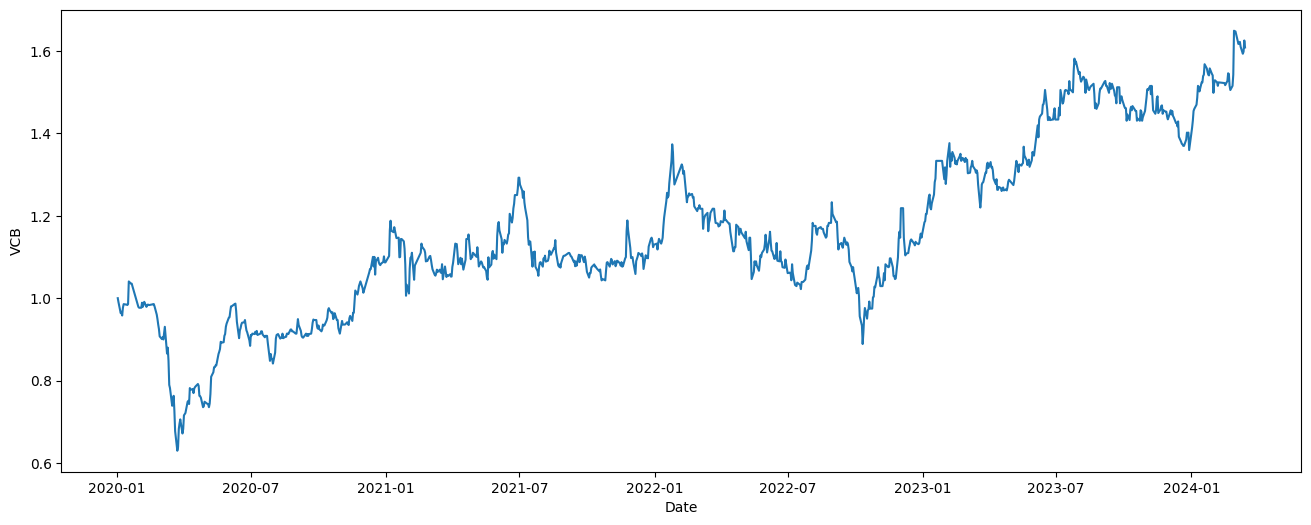

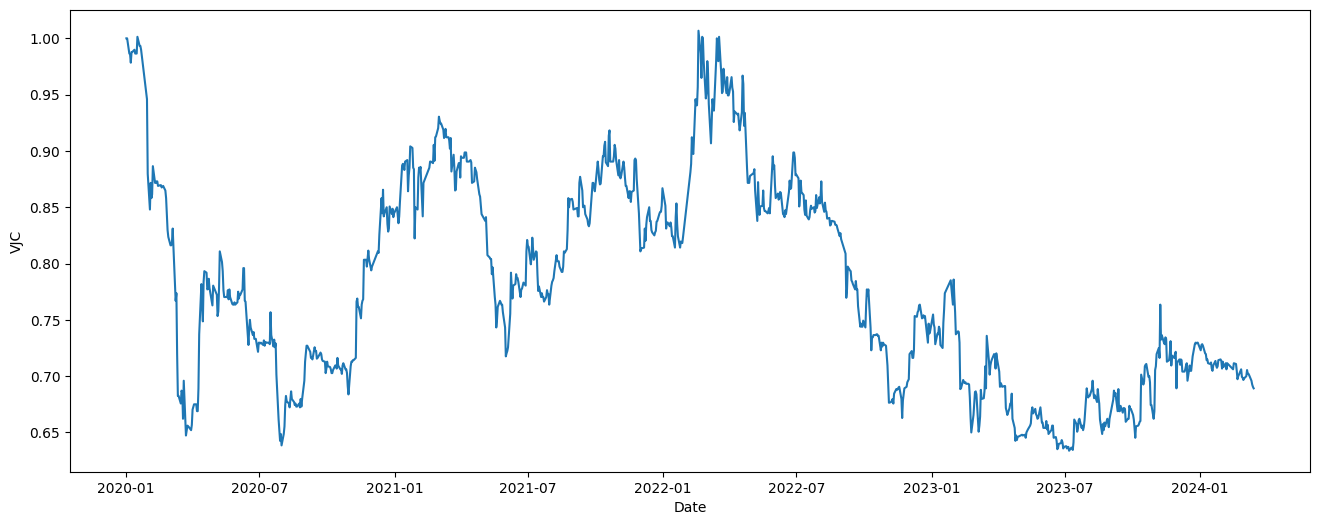

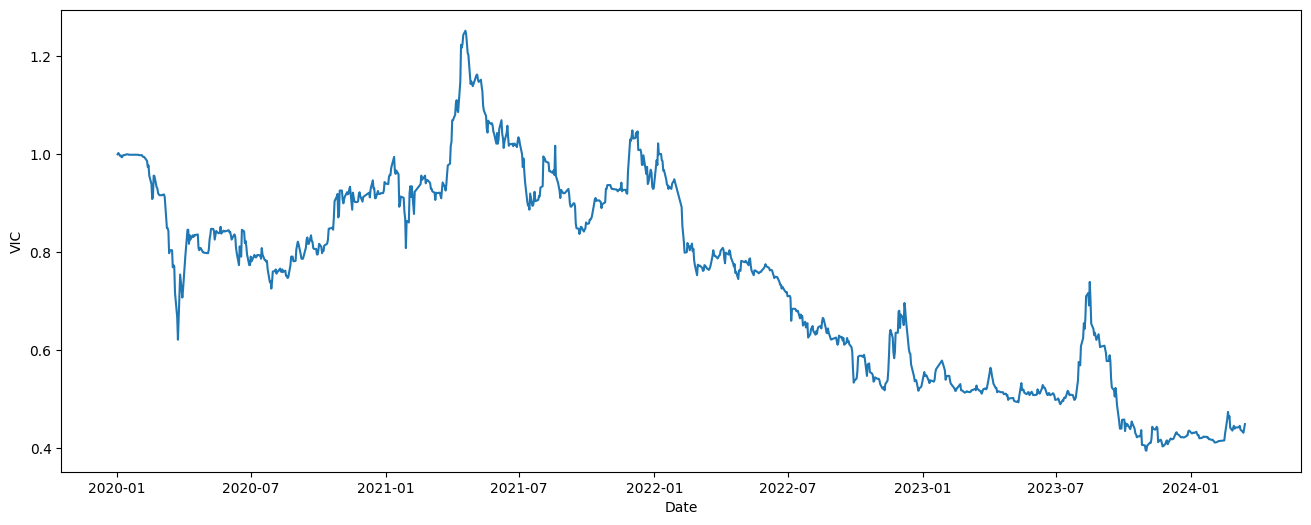

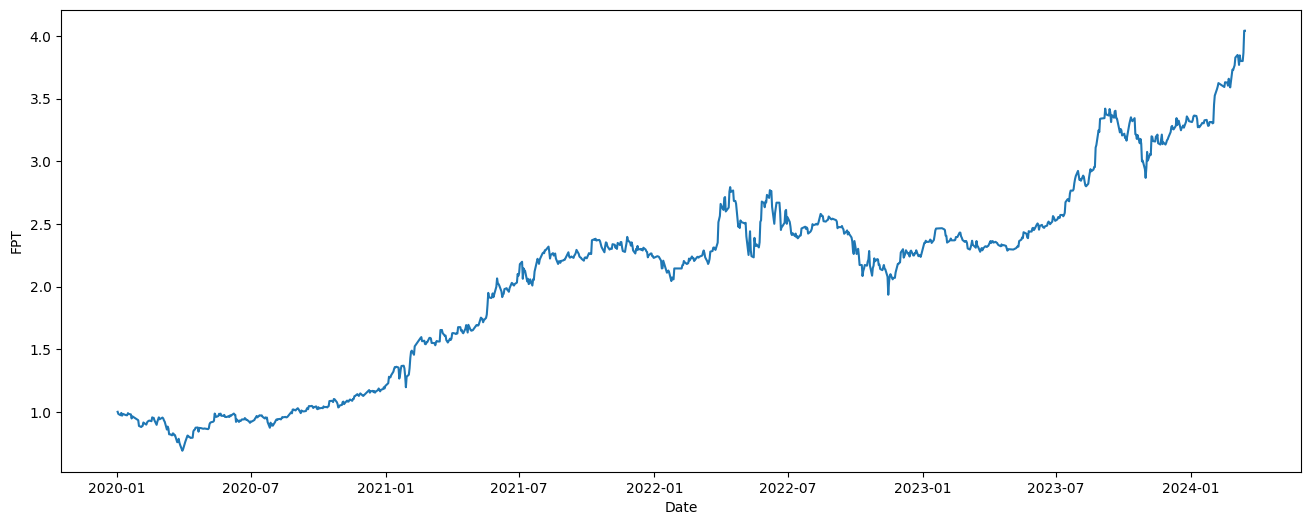

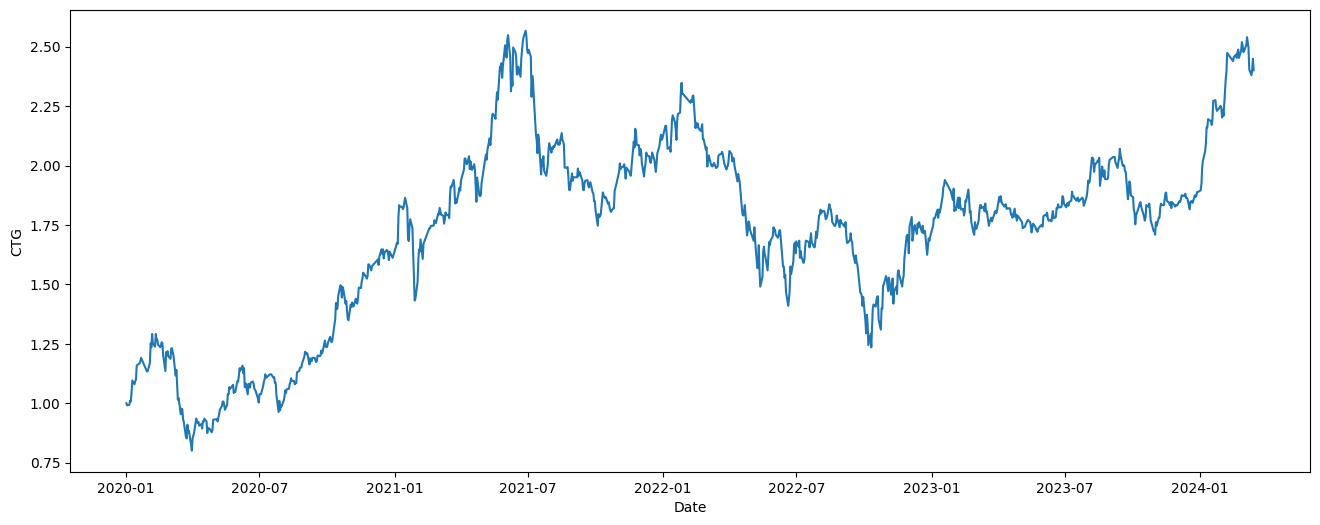

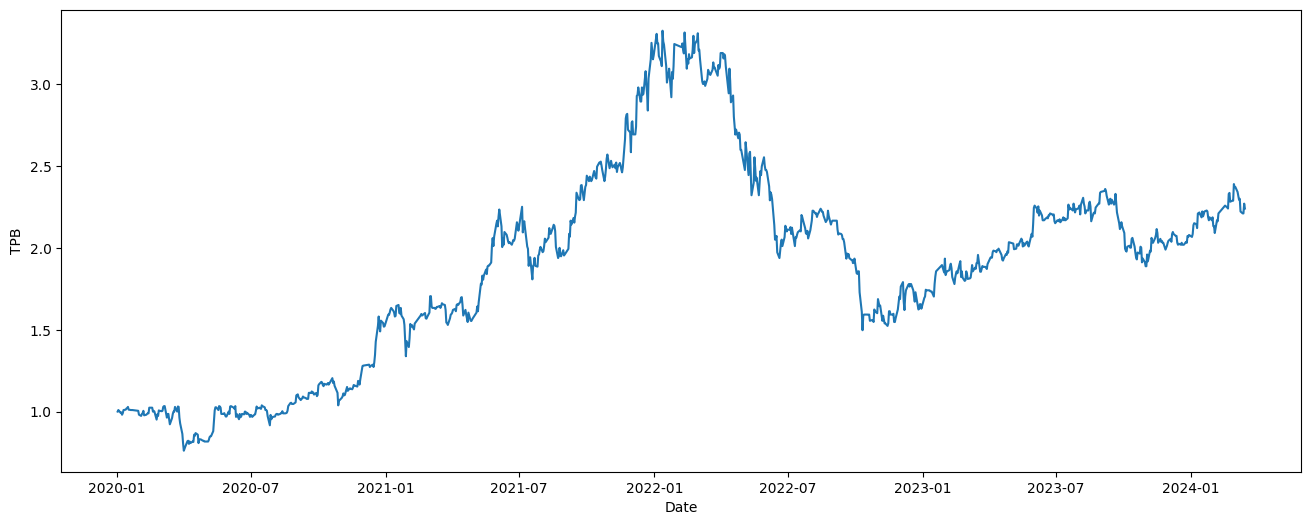

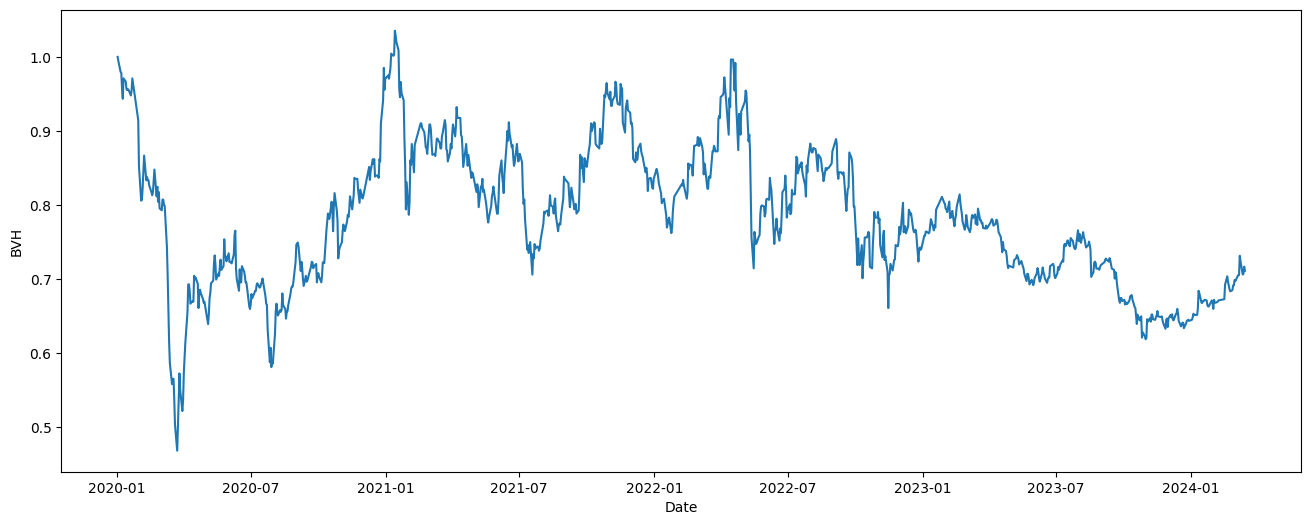

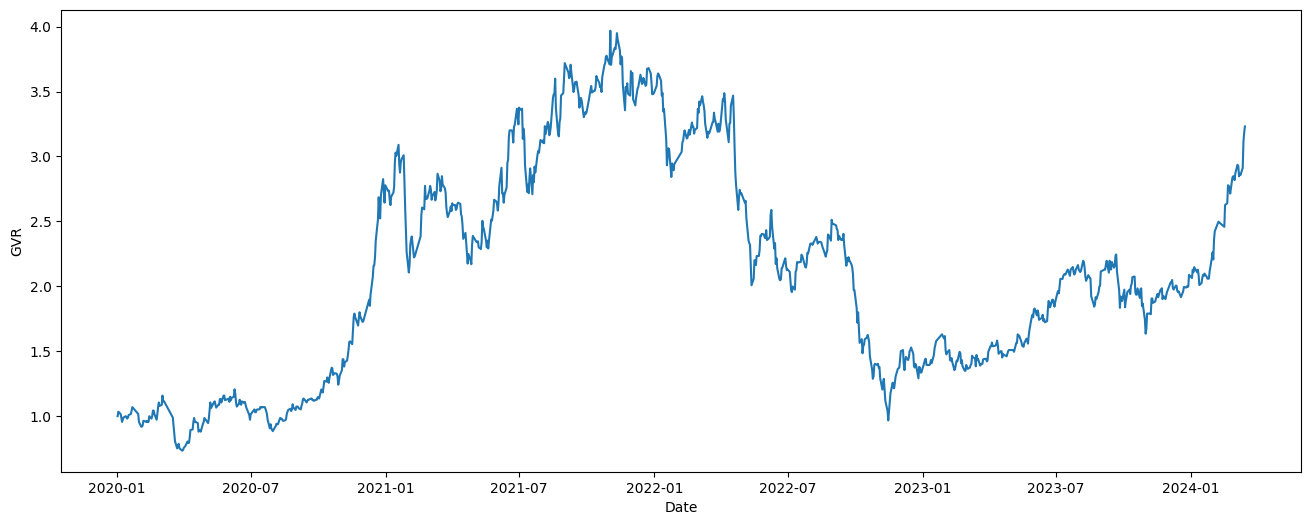

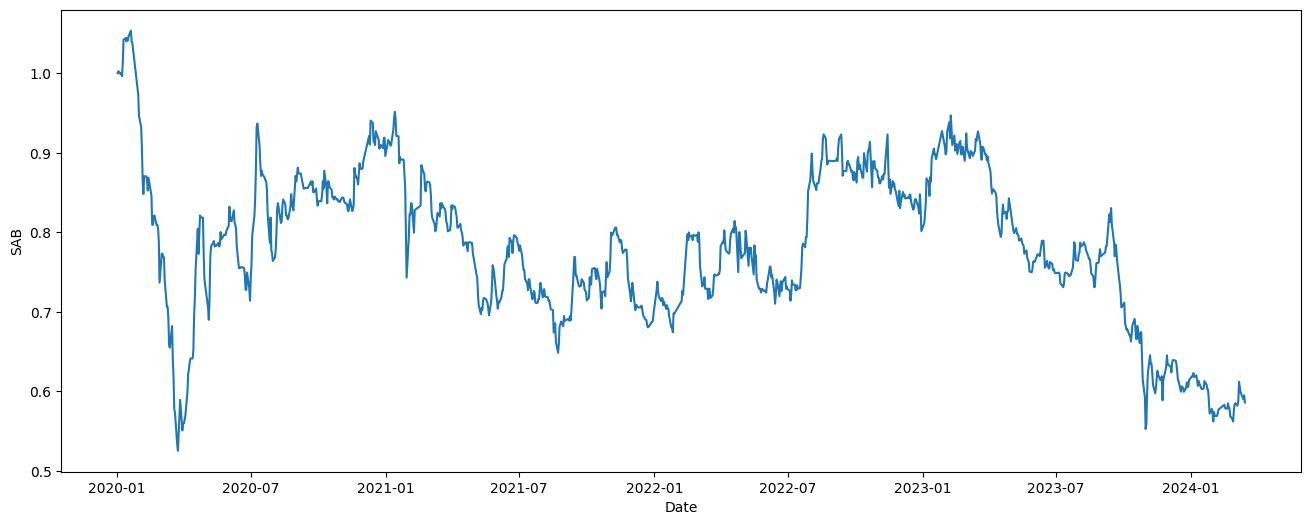

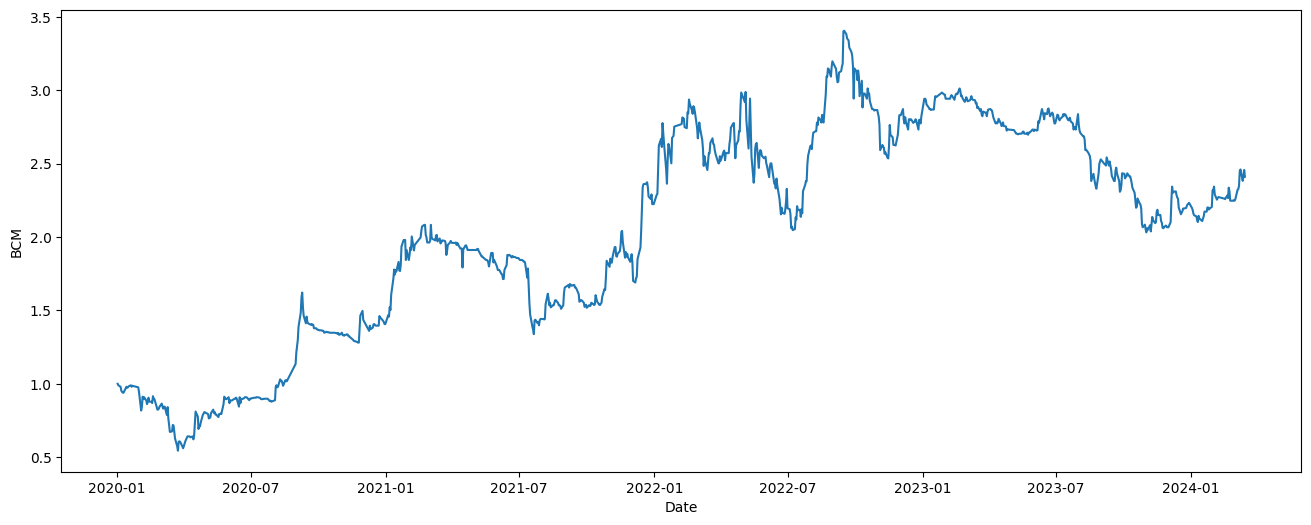

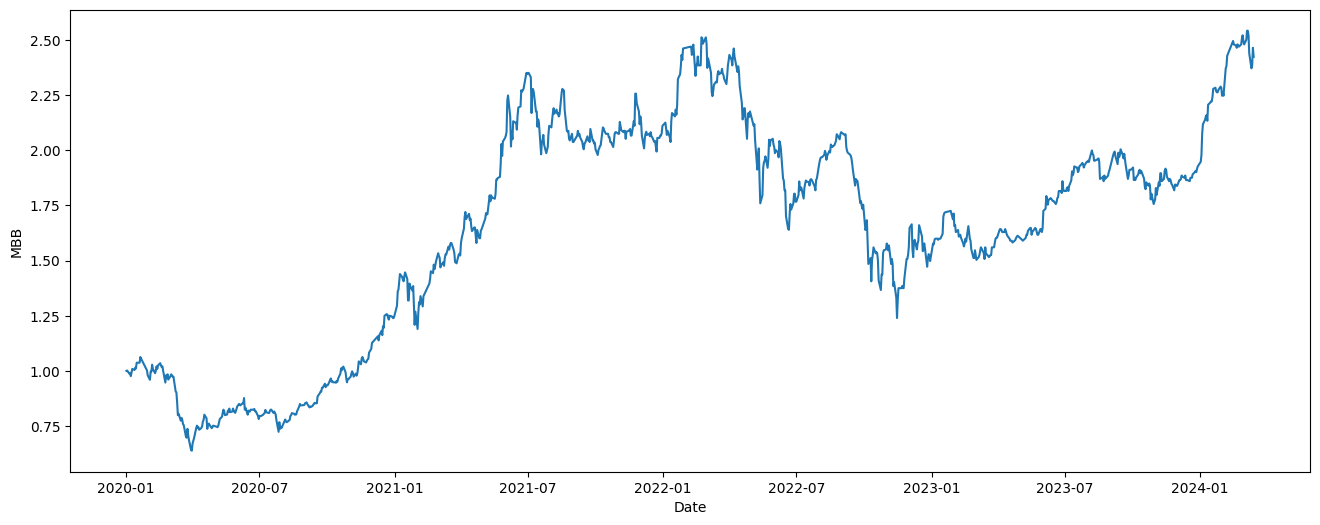

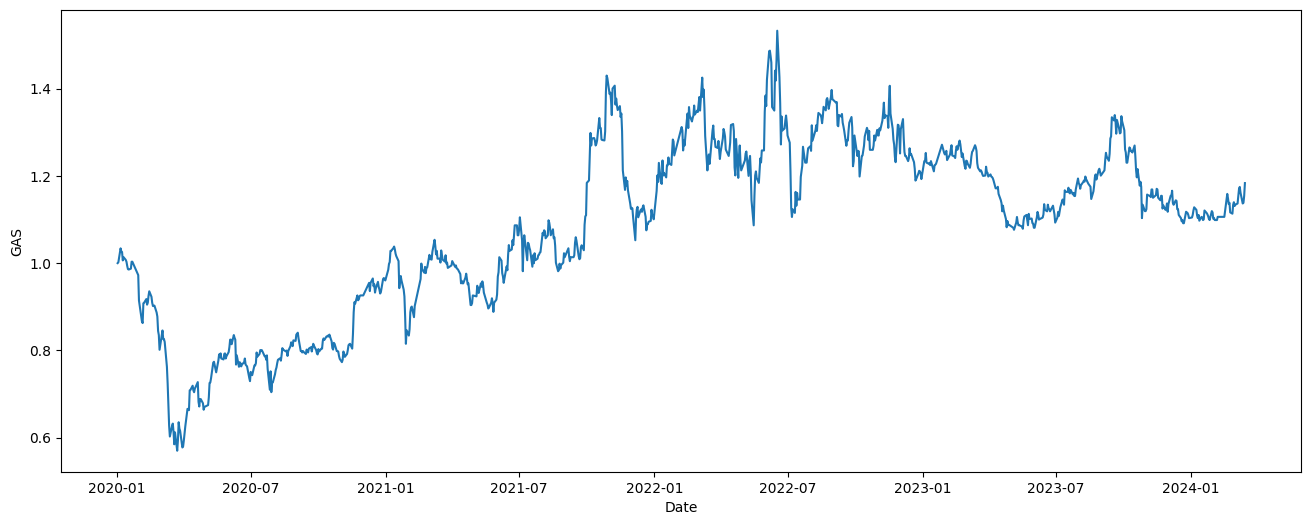

KeyError: 'y'

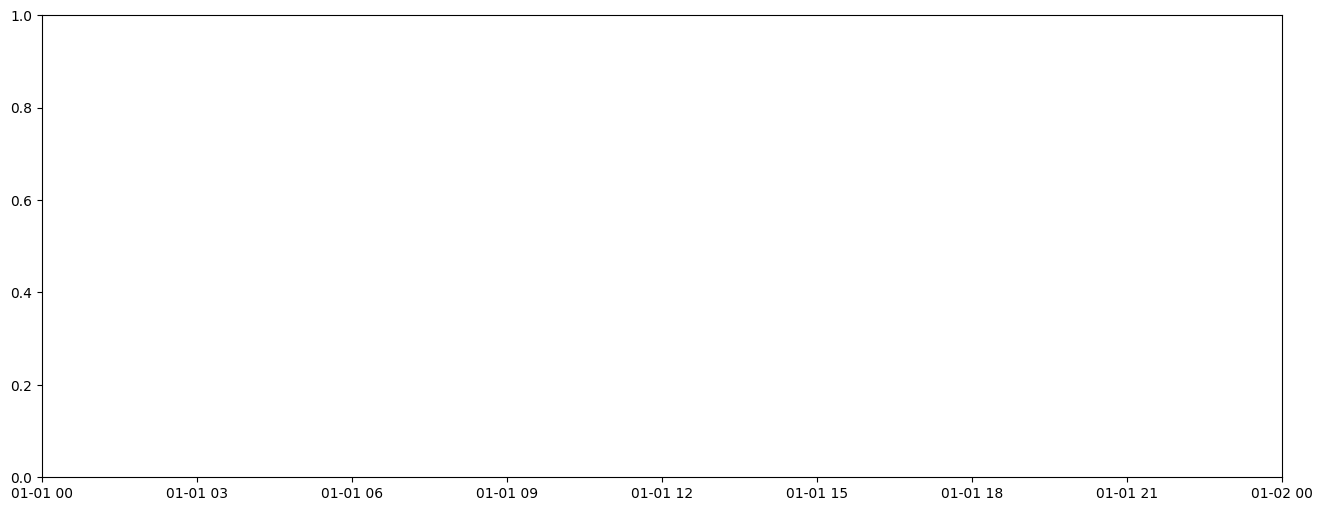

In [14]:
interactive_plot(normalize(df), 'Normalized Prices')

In [17]:
stock_historical_data("VNINDEX", "2000-06-01", "2023-09-18", "1D", "index", source='TCBS')

Time range is 8509 days. Looping through 24 requests


,time,open,high,low,close,volume,ticker
0,2000-07-28,100.00,100.00,100.00,100.00,4200,VNINDEX
1,2000-07-28,100.00,100.00,100.00,100.00,4200,VNINDEX
2,2000-07-31,101.55,101.55,101.55,101.55,10300,VNINDEX
3,2000-08-02,103.38,103.38,103.38,103.38,300,VNINDEX
4,2000-08-04,105.20,105.20,105.20,105.20,3700,VNINDEX
...,...,...,...,...,...,...,...
5619,2023-09-12,1223.55,1245.44,1220.85,1245.44,967867696,VNINDEX
5620,2023-09-13,1249.06,1250.61,1232.84,1238.39,1263786726,VNINDEX
5621,2023-09-14,1238.21,1244.21,1223.03,1223.81,1227453311,VNINDEX
5622,2023-09-15,1225.90,1233.87,1220.27,1227.36,917361628,VNINDEX
